In [1]:
from utils.generafoil import a_b_from_neutral_point, elliptique_rounded
import numpy as np

target_neutral_angle = 2.5  # degrees
flat_length = 0.7  # fraction of chord

x = np.linspace(0, 1, 100)

a, b = a_b_from_neutral_point(target_neutral_angle, flat_length)
print(f"a: {a}, b: {b}")

y_low, alpha = elliptique_rounded(x, a, b)

print(alpha)

a: 0.23076923076923078, b: 0.03203837308558218
2.5


Optimization test 1/1 with initial guess: [0.11826225 0.03974249 0.00323854 0.24090144 0.07687291 0.26976731]
Optimization terminated successfully    (Exit mode 0)
            Current function value: -221.93326502756182
            Iterations: 18
            Function evaluations: 138
            Gradient evaluations: 18


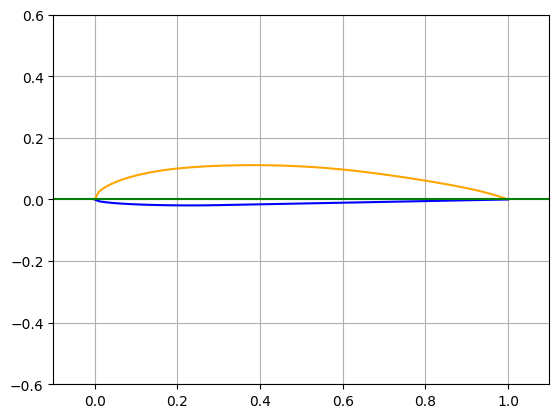

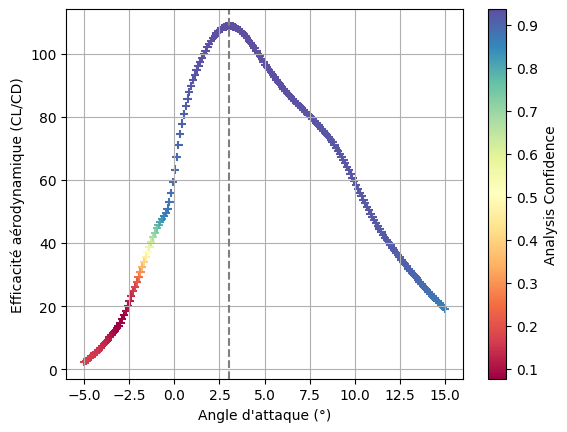

In [8]:
from utils.optimize import converence_contrain, plot_perf_from_argu
from utils.generafoil import plot_from_argu
import numpy as np
import matplotlib.pyplot as plt

flat_length = 0.7
target_neutral_angle = 1.5

result = converence_contrain( 
   target_neutral_angle, 
   flat_length, 
   reynolds_number=3e5, 
   nb_test=1, 
   nb_cst_coeff=6
)

plot_from_argu(result)
plot_perf_from_argu(result, reynolds_number=5e5)

Optimization test 1/1 with initial guess: [0.04112811 0.25541304 0.11616567 0.29704802 0.10589917 0.29492139]
Optimization terminated successfully    (Exit mode 0)
            Current function value: -132.86663108075575
            Iterations: 16
            Function evaluations: 125
            Gradient evaluations: 16
Optimization test 1/1 with initial guess: [0.1735434  0.15094643 0.29964305 0.26367583 0.19032741 0.16094761]
Optimization terminated successfully    (Exit mode 0)
            Current function value: -145.7199001154998
            Iterations: 17
            Function evaluations: 131
            Gradient evaluations: 17
Optimization test 1/1 with initial guess: [0.23808593 0.28733984 0.11466994 0.08267032 0.23432969 0.03961165]
Optimization terminated successfully    (Exit mode 0)
            Current function value: -158.90456996616962
            Iterations: 18
            Function evaluations: 138
            Gradient evaluations: 18
Optimization test 1/1 with initial 

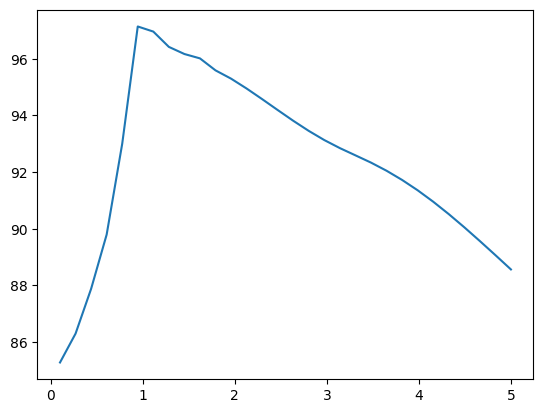

In [ ]:
# Calcul le max de finesse et la finesse moyenne 

from utils.optimize import converence_contrain, perf_from_argu
from utils.generafoil import plot_from_argu
import numpy as np
import matplotlib.pyplot as plt

flat_length = 0.7

target_neutral_angles = np.linspace(0.1, 5, 30)
total_aero = []

for a in target_neutral_angles:

    result = converence_contrain( 
        a, 
        flat_length, 
        reynolds_number=3e5, 
        nb_test=1, 
        nb_cst_coeff=6
    )

    aero, alpha_neutral = perf_from_argu(result, 3e5, np.linspace(-5, +5, 20))

    total_aero.append(aero)



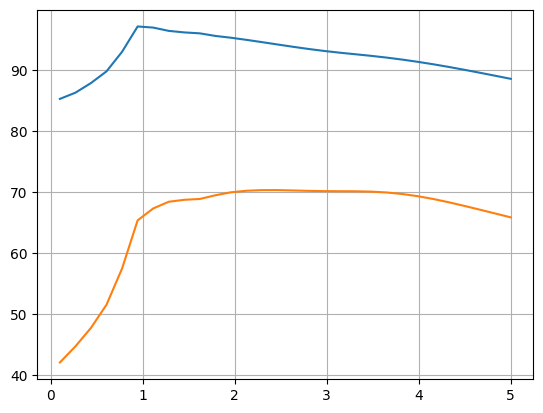

In [7]:

plt.plot(target_neutral_angles, [np.max(total_aero[i]['CL']/total_aero[i]['CD']) for i in range(len(total_aero))])

plt.plot(target_neutral_angles, [np.mean(total_aero[i]['CL']/total_aero[i]['CD']) for i in range(len(total_aero))])


plt.grid()
plt.show()

In [4]:
from utils.generafoil import elliptique_rounded, curve_from_cst
import numpy as np

NB_POINTS = 400

x = np.linspace(0, 1, NB_POINTS)

lmin = 0.4

b = 0.02
a = min(b*2, (1 - lmin)/(2-lmin))
A = [0.3, 0.5, 0.2, 0.1, 0.1, 0.05]

y_low, alpha = elliptique_rounded(x, a, b)
y_up = curve_from_cst(x, A)

target_alpha = -alpha * 360 / np.pi
print(f"Angle neutre {-alpha} rad")
print(f"{target_alpha}") 


Angle neutre -1.1945264895975611 rad
-136.88265274103617


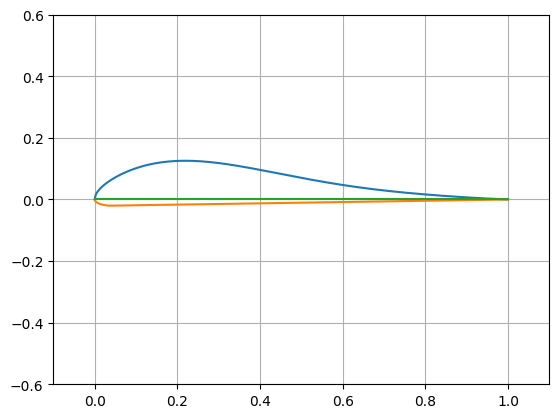

In [5]:
import matplotlib.pyplot as plt

#plt.plot(x, y_zero)
plt.plot(x, y_up)
plt.plot(x, y_low)
plt.plot(x, np.zeros(len(x)))
plt.ylim((-0.6, 0.6))
plt.xlim((-0.1, 1.1))
plt.grid()

In [6]:

# Small demo with random airfoil
import aerosandbox as asb

upper_coords = np.array([x[::-1], y_up[::-1]]).T
lower_coords = np.array([x[1:], y_low[1:]]).T

# Stack them into one continuous array
coord = np.concatenate([upper_coords, lower_coords], axis=0)

airfoil = asb.Airfoil("Experimental", coordinates=np.array(coord)).repanel(n_points_per_side=100)

aero = airfoil.get_aero_from_neuralfoil(
    alpha=np.linspace(-5, 15, 200),
    Re=5e5,
    mach=0,
    include_360_deg_effects=True
)


print(aero['CL']/aero['CD'])

[-12.89292743 -12.77201276 -12.56944768 -12.2976786  -11.96835931
 -11.59161793 -11.17577567 -10.72738107 -10.25142129  -9.75160331
  -9.23063737  -8.69048766  -8.13257724  -7.55794696  -6.96737426
  -6.3614591   -5.74068477  -5.10545955  -4.45614457  -3.79307154
  -3.11655336  -2.42688965  -1.72436889  -1.00926824  -0.2818518
   0.45763198   1.20895355   1.97190569   2.74630709   3.53200588
   4.32888301   5.13685516   5.95587701   6.78594233   7.62708335
   8.47936751   9.34289072  10.21776596  11.10410613  12.00200022
  12.91148217  13.83249246  14.76483319  15.70811833  16.66172139
  17.62472331  18.59586267  19.57348986  20.55552534  21.53942281
  22.52214049  23.50013182  24.46937994  25.42551921  26.36410823
  27.28114365  28.17394282  29.04261442  29.89254749  30.73867517
  31.61222436  32.56858887  33.6890597   35.0642027   36.75754884
  38.7731587   41.05266425  43.49835273  46.00134815  48.46169255
  50.79871029  52.95487983  54.89644566  56.61217649  58.11021881
  59.412966

dict_keys(['analysis_confidence', 'CL', 'CD', 'CM', 'Cpmin', 'Top_Xtr', 'Bot_Xtr', 'mach_crit', 'mach_dd', 'Cpmin_0', 'upper_bl_theta_0', 'upper_bl_theta_1', 'upper_bl_theta_2', 'upper_bl_theta_3', 'upper_bl_theta_4', 'upper_bl_theta_5', 'upper_bl_theta_6', 'upper_bl_theta_7', 'upper_bl_theta_8', 'upper_bl_theta_9', 'upper_bl_theta_10', 'upper_bl_theta_11', 'upper_bl_theta_12', 'upper_bl_theta_13', 'upper_bl_theta_14', 'upper_bl_theta_15', 'upper_bl_theta_16', 'upper_bl_theta_17', 'upper_bl_theta_18', 'upper_bl_theta_19', 'upper_bl_theta_20', 'upper_bl_theta_21', 'upper_bl_theta_22', 'upper_bl_theta_23', 'upper_bl_theta_24', 'upper_bl_theta_25', 'upper_bl_theta_26', 'upper_bl_theta_27', 'upper_bl_theta_28', 'upper_bl_theta_29', 'upper_bl_theta_30', 'upper_bl_theta_31', 'upper_bl_H_0', 'upper_bl_H_1', 'upper_bl_H_2', 'upper_bl_H_3', 'upper_bl_H_4', 'upper_bl_H_5', 'upper_bl_H_6', 'upper_bl_H_7', 'upper_bl_H_8', 'upper_bl_H_9', 'upper_bl_H_10', 'upper_bl_H_11', 'upper_bl_H_12', 'upper_bl

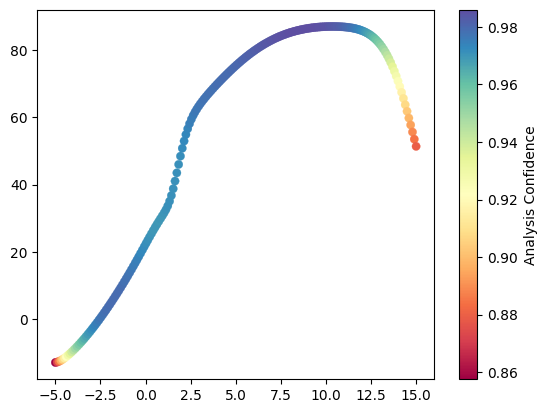

In [7]:
print(aero.keys())
plt.scatter(
    np.linspace(-5, 15, 200),
    aero['CL']/aero['CD'],
    c=aero['analysis_confidence'],  # Just pass the values
    cmap='Spectral',                # Choose the colormap
    label='Données Aérodynamiques',
    linewidths=0.2
)
plt.colorbar(label="Analysis Confidence")

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.27016215459544785
            Iterations: 3
            Function evaluations: 24
            Gradient evaluations: 3
Optimization terminated successfully    (Exit mode 0)
            Current function value: -79.4412001361037
            Iterations: 30
            Function evaluations: 260
            Gradient evaluations: 30
Optimization terminated successfully    (Exit mode 0)
            Current function value: -79.44120013400702
            Iterations: 21
            Function evaluations: 184
            Gradient evaluations: 21
Optimization terminated successfully    (Exit mode 0)
            Current function value: -79.44119986929489
            Iterations: 25
            Function evaluations: 218
            Gradient evaluations: 25
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.20116101847626724
            Iterations: 2
            Function ev

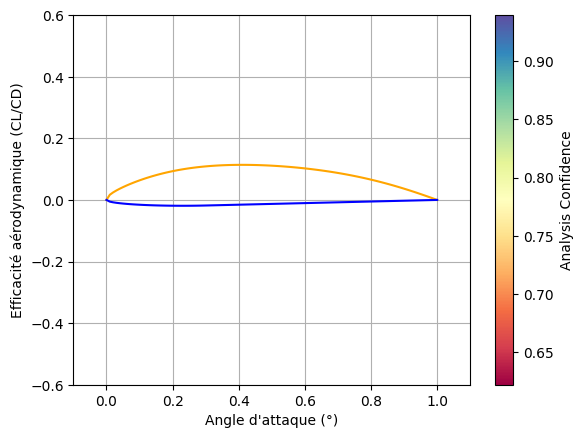

In [5]:
from utils.optimize import converence_contrain, plot_perf_from_argu
from utils.generafoil import plot_from_params, curve_from_cst, elliptique_rounded
import numpy as np

flat_lenght = 0.7

result = converence_contrain( 
   0.12, 
   flat_lenght, 
   reynolds_number=5e5, 
   nb_test=5, 
   nb_cst_coeff=6
)

a = (1 - flat_lenght)/(2 - flat_lenght)
b = result[0]

cst_coefficients = result[2:]

x =  np.linspace(0, 1, 100)

y_up = curve_from_cst(x, cst_coefficients)
y_low, alpha = elliptique_rounded(x, a, b)

plt.plot(x, y_up, c="orange")
plt.plot(x, y_low, c='blue')

plt.ylim((-0.6, 0.6))
plt.xlim((-0.1, 1.1))

plot_perf_from_argu(result, reynolds_number=5e5)

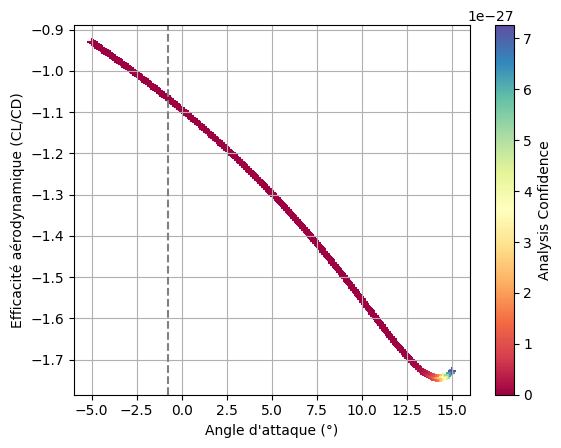

In [7]:
plot_perf_from_argu([flat_lenght] + result, reynolds_number=5e5)

In [ ]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import random


def objective_function(argu, reynolds_number: float, target_e: float, flat_lenght: float) -> float:
    
    a = (1 - flat_lenght)/(2 - flat_lenght)
    b = argu[0]
    cst_coefficients = argu[2:]

    y_up = curve_from_cst(x, cst_coefficients)
    y_low, alpha = elliptique_rounded(x, a, b)

    e = max(y_up - y_low)

    upper_coords = np.array([x[::-1], y_up[::-1]]).T
    lower_coords = np.array([x[1:], y_low[1:]]).T

    # Stack them into one continuous array
    coord = np.concatenate([upper_coords, lower_coords], axis=0)

    airfoil = asb.Airfoil("Experimental", coordinates=np.array(coord)).repanel(n_points_per_side=100)

    aero = airfoil.get_aero_from_neuralfoil(
        alpha=alpha,
        Re=5e5,
        mach=0,
        include_360_deg_effects=True
    )

    
    e_ponderation = np.exp(-abs(e - target_e))
    
    #eff = np.mean()
    #conf = np.min(aero["analysis_confidence"])
    
    eff_pond = np.mean(aero["CL"] * aero['analysis_confidence']/aero["CD"])

    return -eff_pond * e_ponderation

RE_NUMBER = 5e5
INITIAL_A = np.array([random.uniform(0, 0.5) for i in range(1, 12)])

bounds = [(0.01, 0.2)] + [(0, 0.7)] * (len(INITIAL_A) - 1)

# Run the Optimization
print("Starting Optimization...")
opt_result = minimize(
    fun=objective_function, 
    x0=INITIAL_A, 
    args=(RE_NUMBER, 0.2, 0.6), 
    method='SLSQP',        # Recommended constrained, gradient-based method
    bounds=bounds,         # Apply geometric bounds
    options={'disp': True, 'maxiter': 50}
)

Starting Optimization...
Optimization terminated successfully    (Exit mode 0)
            Current function value: -78.7583040375317
            Iterations: 25
            Function evaluations: 323
            Gradient evaluations: 25


In [8]:
def converence_contrain(target_e, flat_lenght, nb_test=20):
    opti_value = []
    opti_coord = []

    for i in range(nb_test):
        INITIAL_A = np.array([random.uniform(0, 0.3) for i in range(8)])
        bounds = [(0.01, 0.2)] + [(0, 0.5)] * (len(INITIAL_A) - 1)

        opt_result = minimize(
            fun=objective_function, 
            x0=INITIAL_A, 
            args=(RE_NUMBER, target_e, flat_lenght), 
            method='SLSQP',        # Recommended constrained, gradient-based method
            bounds=bounds,         # Apply geometric bounds
            options={'disp': True, 'maxiter': 50}
        )

        opti_value.append(opt_result['fun'])
        opti_coord.append(opt_result['x'])


    best = np.min(opti_value)
    best_idx = opti_value.index(best)

    result = opti_coord[best_idx]

    return result


Working on 0.05
Optimization terminated successfully    (Exit mode 0)
            Current function value: -81.03746095962207
            Iterations: 45
            Function evaluations: 433
            Gradient evaluations: 45
Optimization terminated successfully    (Exit mode 0)
            Current function value: -81.03746096710759
            Iterations: 18
            Function evaluations: 179
            Gradient evaluations: 18
Optimization terminated successfully    (Exit mode 0)
            Current function value: -81.03746106595088
            Iterations: 31
            Function evaluations: 300
            Gradient evaluations: 31
Optimization terminated successfully    (Exit mode 0)
            Current function value: -81.03746090277048
            Iterations: 31
            Function evaluations: 303
            Gradient evaluations: 31
Optimization terminated successfully    (Exit mode 0)
            Current function value: -81.0374608368908
            Iterations: 24
     

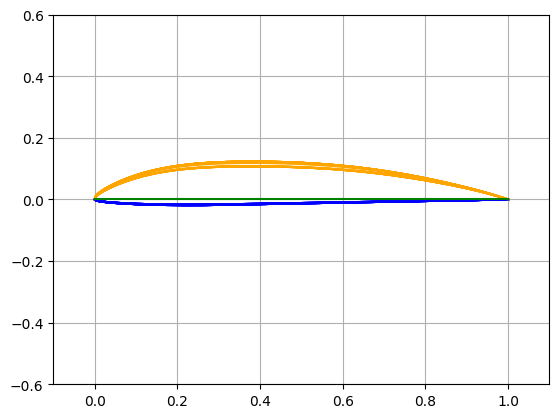

In [9]:
e_targets = np.linspace(0.05, 0.25, 20)
flat_lenght = 0.7

total_results = []

for e in e_targets:
    print(f"Working on {e}")
    result = converence_contrain(e, flat_lenght, 20)
    total_results.append(result)

    a = (1 - flat_lenght)/(2 - flat_lenght)
    b = result[0]

    cst_coefficients = result[2:]

    y_up = curve_from_cst(x, cst_coefficients)
    y_low, alpha = elliptique_rounded(x, a, b)

    plt.plot(x, y_up, c="orange")
    plt.plot(x, y_low, c='blue')
    
    plt.ylim((-0.6, 0.6))
    plt.xlim((-0.1, 1.1))

plt.plot(x, np.zeros(len(x)), c='green')
plt.grid()


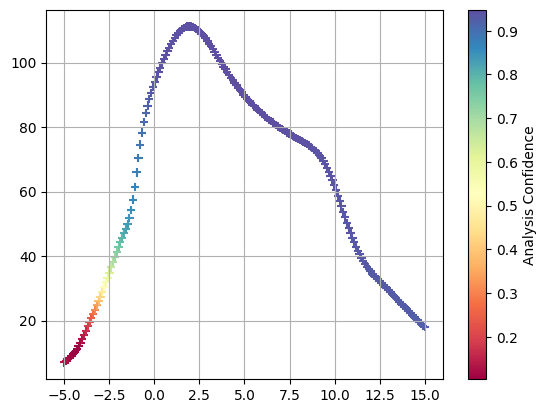

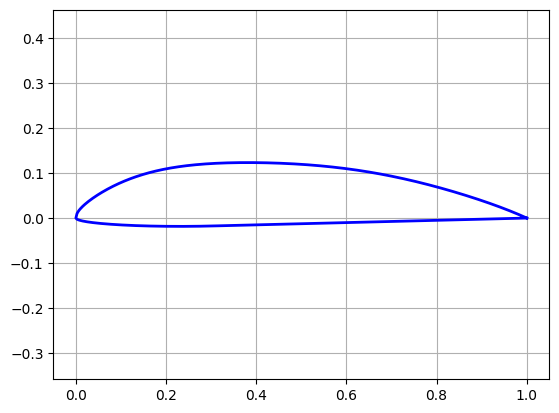

In [12]:
upper_coords = np.array([x[::-1], y_up[::-1]]).T
lower_coords = np.array([x[1:], y_low[1:]]).T

# Stack them into one continuous array
coord = np.concatenate([upper_coords, lower_coords], axis=0)

airfoil = asb.Airfoil("Experimental", coordinates=np.array(coord)).repanel(n_points_per_side=100)

aero = airfoil.get_aero_from_neuralfoil(
    alpha=np.linspace(-5, 15, 200),
    Re=5e5,
    mach=0,
    include_360_deg_effects=True
)

plt.scatter(
    np.linspace(-5, 15, 200),
    aero['CL']/aero['CD'],
    c=aero['analysis_confidence'], 
    cmap='Spectral',               
    label='Données Aérodynamiques',
    marker='+'
)
plt.colorbar(label="Analysis Confidence")
plt.grid()
plt.show()

# Plot airfoil final
plt.plot(coord[:, 0], coord[:, 1], 'b-', linewidth=2)
plt.axis('equal')
plt.grid(True)
plt.show()

In [ ]:
# Saves the results in a csv file
import pandas as pd

# results contains the parameters for each target e 

df = pd.DataFrame(total_results, index=e_targets)
df.index.name = 'target_e'
df.to_csv("optimization_results_total.csv")

In [14]:
from utils.optimize import perf_from_argu

for r in total_results:
    params = [flat_lenght] + list(r)
    aero, alpha_neutral = perf_from_argu(params, x, reynolds_number=RE_NUMBER)
    #print(f"CL: {aero['CL'][0]}, CD: {aero['CD'][0]}, CM: {aero['CM'][0]}")
    print(f"{alpha_neutral}")

-0.013626859351673879
-0.013626859351673879
-0.013626859351683776
-0.01723565728493007
-0.02442758697691874
-0.03156433019429881
-0.038712379300330065
-0.045735446166237724
-0.05272835383040065
-0.05968695278389406
-0.0666093003974934
-0.07347771961296803
-0.08033342833463536
-0.08717991753326147
-0.09397784521411734
-0.100748388602069
-0.10749495269193672
-0.11421419750795472
-0.12091292397218824
-0.12758246651787575


### Equation de alpha = f(e)

On met en evidence l'éqaution linéaire entre entre l'epaisseur et l'angle neutre $alpha = -0.0069e - 0.0182$


[-7.79015794e-02 -7.78587910e-02 -7.77710492e-02 -7.76393569e-02
 -7.74665299e-02 -7.72567029e-02 -7.70146244e-02 -7.67448977e-02
 -7.64513191e-02 -7.61364091e-02 -7.58011796e-02 -7.54451239e-02
 -7.50663800e-02 -7.46619841e-02 -7.42281067e-02 -7.37601569e-02
 -7.32527022e-02 -7.26992883e-02 -7.20924271e-02 -7.14240854e-02
 -7.06867731e-02 -6.98748721e-02 -6.89855479e-02 -6.80188071e-02
 -6.69768267e-02 -6.58630636e-02 -6.46816356e-02 -6.34371952e-02
 -6.21352646e-02 -6.07828352e-02 -5.93889482e-02 -5.79649398e-02
 -5.65240927e-02 -5.50806172e-02 -5.36481495e-02 -5.22381551e-02
 -5.08585734e-02 -4.95127692e-02 -4.81986021e-02 -4.69073907e-02
 -4.56228586e-02 -4.43212527e-02 -4.29778802e-02 -4.15943316e-02
 -4.02449578e-02 -3.90499114e-02 -3.80394984e-02 -3.71295020e-02
 -3.62273461e-02 -3.52816525e-02 -3.42647434e-02 -3.31492671e-02
 -3.18988698e-02 -3.04720682e-02 -2.88351284e-02 -2.69763145e-02
 -2.49126942e-02 -2.26877470e-02 -2.03665012e-02 -1.80329159e-02
 -1.57794571e-02 -1.36745

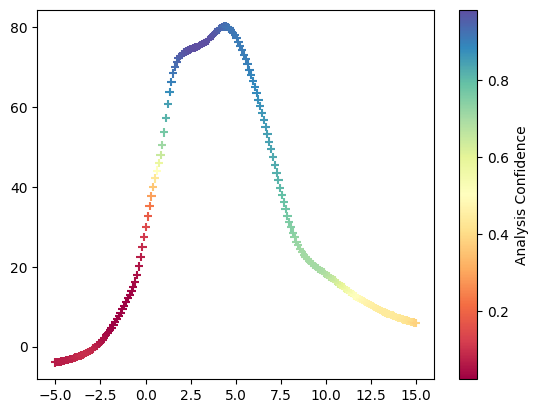

In [17]:


aero = nf.get_aero_from_coordinates(  # You can use xy airfoil coordinates as an entry point
    coordinates=np.array(coord), 
    alpha=np.linspace(-5, 15, 200),  # Vectorize your evaluations across `alpha` and `Re`
    Re=5e5,
    model_size='xxxlarge'
)

plt.scatter(
    np.linspace(-5, 15, 200),
    aero['CL']/aero['CD'],
    c=aero['analysis_confidence'], 
    cmap='Spectral',               
    label='Données Aérodynamiques',
    marker='+'
)
plt.colorbar(label="Analysis Confidence")
print(aero['CM'])

In [ ]:
import pandas as pd

shape_data = pd.read_csv("opti_shapes.csv")

# DataFrame 'shape_data' contains:
# 'target_e', 'flat_lenght', 'e0', 'e1', 'e2', 'e3', 'e4', 'e5', 'e6', 'e7'
# This for 20 target_e values between 0.05 and 0.25

print(shape_data.head())

# For each thinckness value, find the corresponding parameters from shape_data and interpolate if necessary
def get_shape_params(target_e):
    if target_e in shape_data['target_e'].values:
        row = shape_data[shape_data['target_e'] == target_e].iloc[0]
        return [row['flat_lenght'], row['e0'], row['e1'], row['e2'], row['e3'], row['e4'], row['e5'], row['e6'], row['e7']]
    else:
        lower_rows = shape_data[shape_data['target_e'] < target_e]
        upper_rows = shape_data[shape_data['target_e'] > target_e]
        if lower_rows.empty or upper_rows.empty:
            raise ValueError("Target e is out of bounds of the data.")
        
        lower_row = lower_rows.iloc[-1]
        upper_row = upper_rows.iloc[0]
        
        ratio = (target_e - lower_row['target_e']) / (upper_row['target_e'] - lower_row['target_e'])
        
        interpolated_params = []
        for col in ['flat_lenght', 'e0', 'e1', 'e2', 'e3', 'e4', 'e5', 'e6', 'e7']:
            interpolated_value = lower_row[col] + ratio * (upper_row[col] - lower_row[col])
            interpolated_params.append(interpolated_value)
        
        return interpolated_params
    

params_list = []

for t in thicknesses:
    params = get_shape_params(t)
    params_list.append(params)
    print(f"Thickness: {t:.4f}, Parameters: {params}")
